In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [116]:
! ls csv

ridge_benchmark.csv			      ridge_benchmark_opu_400_500.csv
ridge_benchmark_first.csv		      ridge_benchmark_rbf.csv
ridge_benchmark_opu.csv			      ridge_benchmark_syn_opu.csv
ridge_benchmark_opu_1000.csv		      ridge_benchmark_syn_opu_1.csv
ridge_benchmark_opu_300_600_700_no_dummy.csv  ridge_benchmark_syn_opu_2.csv


In [117]:
opu_df = pd.read_csv('csv/ridge_benchmark_opu.csv')

In [118]:
len(opu_df)

9240

In [119]:
opu_df_1000 = pd.read_csv('csv/ridge_benchmark_opu_1000.csv')

In [120]:
len(opu_df_1000)

840

In [66]:
opu_df.sort_values(by='test_score', ascending=False).iloc[:100]

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
6715,sqrt,10.00,0.0,500.0,1.0,10000.0,0.0,0.8791,25.993031
6475,sqrt,5.00,0.0,500.0,1.0,10000.0,0.0,0.8790,25.701525
5995,sqrt,0.50,0.0,500.0,1.0,10000.0,0.0,0.8788,25.305773
5275,sqrt,0.00,0.0,500.0,1.0,10000.0,0.0,0.8788,25.612196
6235,sqrt,1.00,0.0,500.0,1.0,10000.0,0.0,0.8788,26.017688
5515,sqrt,0.05,0.0,500.0,1.0,10000.0,0.0,0.8788,25.218071
5755,sqrt,0.10,0.0,500.0,1.0,10000.0,0.0,0.8788,25.271999
2633,NaN,0.50,0.0,400.0,1.0,10000.0,3.0,0.8786,24.081424
2393,NaN,0.10,0.0,400.0,1.0,10000.0,3.0,0.8786,24.904047
2153,NaN,0.05,0.0,400.0,1.0,10000.0,3.0,0.8786,23.936113


In [18]:
opu_df.head()

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
0,NaN,0.0,1.0,400.0,0.0,10.0,0.0,0.5329,0.031044
1,NaN,0.0,1.0,400.0,0.0,10.0,1.0,0.5088,0.030055
2,NaN,0.0,1.0,400.0,0.0,10.0,2.0,0.5636,0.028479
3,NaN,0.0,1.0,400.0,0.0,10.0,3.0,0.5577,0.027243
4,NaN,0.0,1.0,400.0,0.0,10.0,4.0,0.5522,0.027955


In [121]:
rbf_df = pd.read_csv('csv/ridge_benchmark_rbf.csv')

In [79]:
opu_df.sort_values(by='test_score', ascending=False).iloc[:100]

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
6715,sqrt,10.00,0.0,500.0,1.0,10000.0,0.0,0.8791,25.993031
6475,sqrt,5.00,0.0,500.0,1.0,10000.0,0.0,0.8790,25.701525
5995,sqrt,0.50,0.0,500.0,1.0,10000.0,0.0,0.8788,25.305773
5275,sqrt,0.00,0.0,500.0,1.0,10000.0,0.0,0.8788,25.612196
6235,sqrt,1.00,0.0,500.0,1.0,10000.0,0.0,0.8788,26.017688
5515,sqrt,0.05,0.0,500.0,1.0,10000.0,0.0,0.8788,25.218071
5755,sqrt,0.10,0.0,500.0,1.0,10000.0,0.0,0.8788,25.271999
2633,NaN,0.50,0.0,400.0,1.0,10000.0,3.0,0.8786,24.081424
2393,NaN,0.10,0.0,400.0,1.0,10000.0,3.0,0.8786,24.904047
2153,NaN,0.05,0.0,400.0,1.0,10000.0,3.0,0.8786,23.936113


In [122]:
syn_df = pd.read_csv('csv/ridge_benchmark_syn_opu.csv')

In [114]:
syn_df['alpha'].unique()

array([ 0.  ,  0.05,  0.1 ,  0.5 ,  1.  ,  5.  , 10.  ])

In [123]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [124]:
def plot_misclassification_errors(dataframes, labels):
    
    plt.figure(figsize=(24,10))
    
    for label, dataframe in zip(labels, dataframes):
        x_values = sorted(dataframe['output_dim'].unique())[9:]

        y_means = []
        y_stds = []

        for x_val in x_values:
            ys = (1 - dataframe.query('output_dim == "{}"'.format(x_val))['test_score'])
            y_means.append(ys.mean())
            y_stds.append(ys.std())
        print(label, y_means)
        
        plt.errorbar(x_values, y_means, y_stds, linestyle='dotted', marker='^', capsize=3, label=label)
    plt.legend(loc='upper right')
    plt.xlim((0, 10000))
    plt.xlabel('Output Dimension (D)')
    plt.ylabel('Classification Error on Fashion MNIST')
    plt.title('Error versus number of random projections')
    # plt.ylim((0.075, 0.25))
    plt.show()

In [125]:
df_opu_300 = opu_df.query('alpha == "0.5" & exposure_us == "300" & dummy_input=="0.0" & activation!="sqrt"')

In [126]:
df_opu_400 = opu_df.query('alpha == "0.5" & exposure_us == "400" & dummy_input=="0.0" & activation!="sqrt"')

In [127]:
df_opu_500 = opu_df.query('alpha == "0.5" & exposure_us == "500" & dummy_input=="0.0" & activation!="sqrt"')

In [128]:
df_opu_600 = opu_df.query('alpha == "0.5" & exposure_us == "600" & dummy_input=="0.0" & activation!="sqrt"')

In [129]:
df_opu_700 = opu_df.query('alpha == "0.5" & exposure_us == "700" & dummy_input=="0.0" & activation!="sqrt"')

In [134]:
df_opu_1000 = opu_df_1000.query('alpha == "0.5" & exposure_us == "1000" & dummy_input=="0.0" & activation!="sqrt"')

In [130]:
rbf_df_0 = rbf_df.query('alpha == "0.5" & dummy_input=="0.0"')

In [131]:
df_syn_1 = syn_df.query('alpha == "0.5" & dummy_input=="0.0" & activation.isnull() & bias=="0.0"')

In [132]:
df_syn_2 = syn_df.query('alpha == "0.5" & dummy_input=="0.0" & activation=="sqrt" & bias=="0.0"')

In [133]:
df_syn_3 = syn_df.query('alpha == "0.5" & dummy_input=="0.0" & activation=="cos" & bias=="1.0"')

In [77]:
df_syn_2.head()

,activation,alpha,bias,dummy_input,framework,inversion_warning,kernel,output_dim,seed,test_score,training_time
2163,sqrt,0.5,0.0,0.0,pytorch,0.0,opu,10.0,0.0,0.5400,0.028228
2169,sqrt,0.5,0.0,0.0,pytorch,0.0,opu,10.0,1.0,0.5387,0.022632
2175,sqrt,0.5,0.0,0.0,pytorch,0.0,opu,10.0,2.0,0.4930,0.023061
2181,sqrt,0.5,0.0,0.0,pytorch,0.0,opu,10.0,3.0,0.5447,0.022693
2187,sqrt,0.5,0.0,0.0,pytorch,0.0,opu,10.0,4.0,0.4764,0.022701


RBF Fourier Features [0.21722000000000002, 0.1931, 0.17883999999999997, 0.17126000000000002, 0.1649, 0.1598, 0.15658, 0.15278, 0.14959999999999998, 0.14746, 0.13488, 0.12954, 0.12533999999999995, 0.12198000000000002, 0.11644000000000002]
Synthetic OPU [0.21812, 0.19297999999999998, 0.18004, 0.17162, 0.16436, 0.15972, 0.15494, 0.15307999999999997, 0.14980000000000002, 0.14698, 0.13572, 0.1305, 0.12605999999999998, 0.12388000000000002, 0.11927999999999998]
sqrt(OPU) [0.21848, 0.19394000000000003, 0.18078, 0.17272, 0.16504, 0.16076000000000001, 0.15619999999999998, 0.1537, 0.15072000000000002, 0.14789999999999998, 0.13626, 0.13112000000000001, 0.12708, 0.12394000000000001, 0.11806000000000001]
Real OPU 300us [0.23026, 0.20268000000000003, 0.1881, 0.1796, 0.17281999999999997, 0.16616000000000003, 0.16358, 0.15974000000000002, 0.15748, 0.15424, 0.14224, 0.13654, 0.13204, 0.13054000000000002, 0.1247]
Real OPU 400us [0.23057999999999995, 0.2028, 0.18638, 0.17826, 0.17185999999999998, 0.16558,

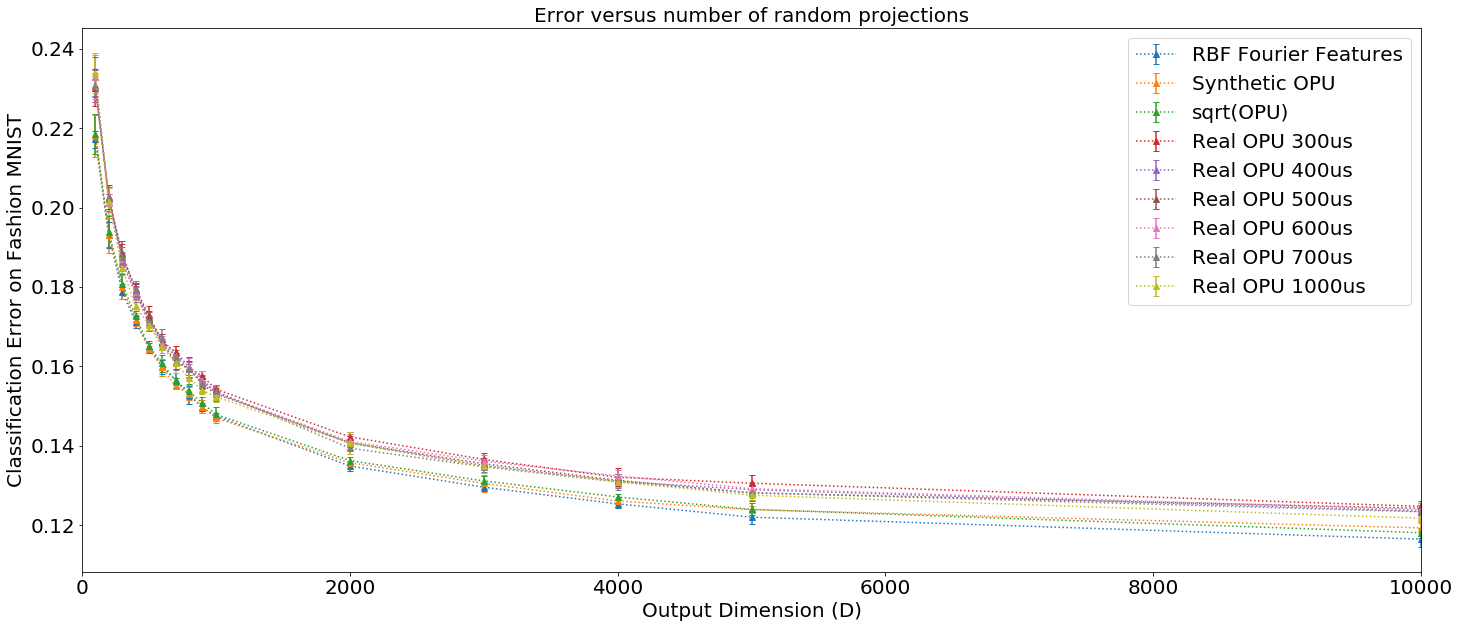

In [135]:
plot_misclassification_errors(
    [rbf_df_0, df_syn_1, df_syn_2, df_opu_300, df_opu_400, df_opu_500, df_opu_600, df_opu_700, df_opu_1000],
    ['RBF Fourier Features', 'Synthetic OPU', 'sqrt(OPU)', 'Real OPU 300us', 'Real OPU 400us', 'Real OPU 500us', 'Real OPU 600us', 'Real OPU 700us', 'Real OPU 1000us']
)

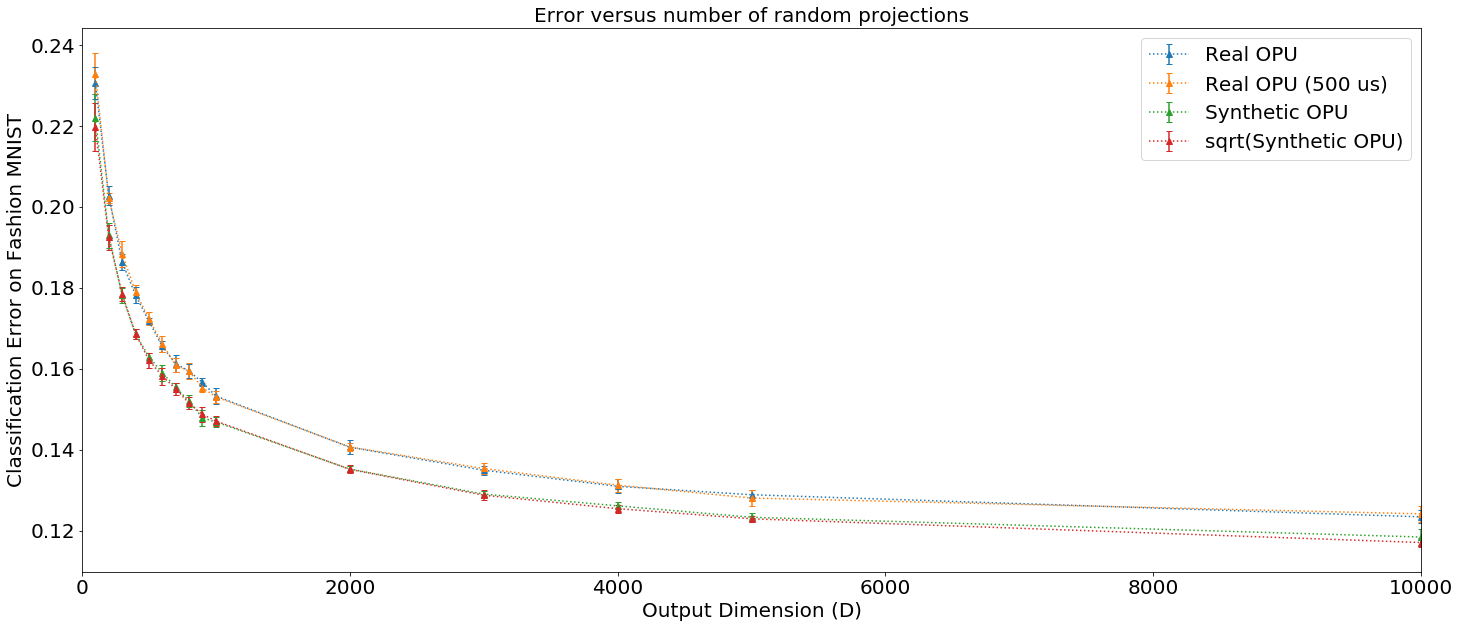

In [140]:
plot_misclassification_errors([df_1, df_3, df_syn, df_syn_2], ['Real OPU', 'Real OPU (500 us)', 'Synthetic OPU', 'sqrt(Synthetic OPU)'])
# plot_misclassification_errors([df_1, df_2, df_3, df_4, df_syn, df_syn_2], ['Real OPU', 'sqrt(Real OPU)', 'Real OPU (500 us)', 'Real OPU (dummy)', 'Synthetic OPU', 'sqrt(Synthetic OPU)'])

In [68]:
opu_df.query('output_dim == "10000.0"')

,activation,alpha,dummy_input,exposure_us,inversion_warning,output_dim,seed,test_score,training_time
230,NaN,0.00,1.0,400.0,1.0,10000.0,0.0,0.8744,24.632692
231,NaN,0.00,1.0,400.0,1.0,10000.0,1.0,0.8760,24.385024
232,NaN,0.00,1.0,400.0,1.0,10000.0,2.0,0.8753,24.201481
233,NaN,0.00,1.0,400.0,1.0,10000.0,3.0,0.8719,24.183566
234,NaN,0.00,1.0,400.0,1.0,10000.0,4.0,0.8768,24.118198
235,sqrt,0.00,1.0,400.0,1.0,10000.0,0.0,0.8762,25.940405
236,sqrt,0.00,1.0,400.0,1.0,10000.0,1.0,0.8743,26.300503
237,sqrt,0.00,1.0,400.0,1.0,10000.0,2.0,0.8733,25.018223
238,sqrt,0.00,1.0,400.0,1.0,10000.0,3.0,0.8708,25.080504
239,sqrt,0.00,1.0,400.0,1.0,10000.0,4.0,0.8747,25.144245
